# AI Ethics Assignment

**Theme:** "Designing Responsible and Fair AI Systems"

This notebook contains the theoretical answers, case study analyses, the COMPAS fairness audit code (practical part), the 300-word report, and the bonus policy proposal. Use the notebook as a reproducible submission and adapt the code cells to run in your environment (install required packages where noted).


## Part 1: Theoretical Understanding (30%)

### Q1: Define algorithmic bias and provide two examples
**Answer:**

Algorithmic bias occurs when an AI system produces systematically unfair outcomes for certain individuals or groups due to biased data, model design, or deployment context. Bias can be introduced at data collection, labeling, feature selection, model training, or via proxy features that correlate with protected attributes.

**Examples:**
1. **Hiring tool bias:** A recruiting model trained on historical hires that favored men will learn gendered patterns and downgrade female applicants, reducing interview invitations for women.
2. **Facial recognition bias:** A face recognition model trained mostly on lighter-skinned faces shows higher error rates on darker-skinned people, increasing the risk of misidentification and wrongful policing.

---

### Q2: Transparency vs Explainability
**Transparency:** Openness about system design, data sources, model type, training procedure, and governance. It allows stakeholders to inspect documentation and provenance.

**Explainability:** The ability to provide human-understandable reasons for specific outputs (e.g., why a loan was denied). Explainability helps affected individuals and auditors understand decisions.

**Why both matter:** Transparency enables auditability and institutional trust; explainability enables contestability and remediation for individuals. Combined, they support accountability and ethical deployment.

---

### Q3: GDPR impact on AI development in the EU
- **Data minimization & purpose limitation**: collect only necessary data and use it for defined purposes.
- **Lawful basis & consent**: personal data for training requires consent or legitimate interest with safeguards.
- **Automated decision-making rules**: individuals have rights regarding automated decisions and can request human review (Article 22).
- **Data subject rights**: access, rectification, erasure, portability — affecting dataset governance and retraining.
- **DPIA**: Data Protection Impact Assessments required for high-risk processing.
- **Accountability**: documentation, records of processing, and organizational safeguards.

---

### Matching: Principles
A) Justice — Fair distribution of AI benefits and risks.

B) Non-maleficence — Ensuring AI does not harm individuals or society.

C) Autonomy — Respecting users' right to control their data and decisions.

D) Sustainability — Designing AI to be environmentally friendly.



## Part 2: Case Study Analysis (40%)

### Case 1: Biased Hiring Tool (Amazon example)
**Scenario:** Model penalized female candidates.

**Sources of bias:**
- Training data reflecting historical gender imbalance.
- Proxy features correlated with gender (e.g., certain schools, career gaps).
- Label bias where past promotions reflect systemic bias.

**Three fixes:**
1. **Data remediation & augmentation:** balance the dataset, collect diverse labeled examples, and remove direct gender features.
2. **Feature audit & proxy removal:** identify and remove or transform features that act as proxies for gender.
3. **Fair training + human oversight:** use fairness-aware algorithms (reweighing, adversarial debiasing) and require human review for automated exclusions.

**Metrics to evaluate fairness:**
- Disparate impact (selection rate ratio)
- Equal opportunity difference (difference in TPR)
- False positive/negative rate parity
- Calibration within groups

---

### Case 2: Facial Recognition in Policing
**Risks:** wrongful arrests, discrimination, privacy invasion, erosion of public trust.

**Responsible deployment policies:**
1. No sole reliance on automated match for arrests — require human verification.
2. Independent bias testing and audits before deployment.
3. Transparency reports and limited use-case policies (serious crimes only).
4. Access controls, retention limits, and community oversight.



## Part 3: Practical Audit — COMPAS Dataset (25%)

This section contains a reproducible audit plan using IBM's AIF360 toolkit. The notebook includes installation instructions, baseline model training (logistic regression), fairness metrics, visualization code, and an example mitigation (Reweighing).

**Install prerequisites (run in a notebook cell):**
```bash
!pip install numpy pandas matplotlib seaborn scikit-learn aif360==0.4.0
```

**Note:** AIF360 can be sensitive to environment and versions; if installation fails, run in a local conda environment (recommended).


In [1]:

# Part 3 - Setup and imports (do NOT run this if aif360 fails to install)
try:
    from aif360.datasets import CompasDataset
    from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
    from aif360.algorithms.preprocessing import Reweighing
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import Pipeline
    print('Imports OK - AIF360 available')
except Exception as e:
    print('Import error - ensure AIF360 and dependencies are installed in your environment:', e)


Import error - ensure AIF360 and dependencies are installed in your environment: No module named 'aif360'


In [2]:

# Load COMPAS dataset via AIF360 (if available)
try:
    compas = CompasDataset()
    print('COMPAS dataset loaded. Number of instances:', compas.features.shape[0])
    # Convert to dataframe view
    df, meta = compas.convert_to_dataframe()
    display(df.head())
except Exception as e:
    print('Could not load COMPAS dataset via AIF360 in this environment:', e)


Could not load COMPAS dataset via AIF360 in this environment: name 'CompasDataset' is not defined


In [3]:
# Baseline classifier training (conceptual) - replace with real training when AIF360 works

print('This cell contains the baseline training steps. Run in an environment with AIF360 installed.')

This cell contains the baseline training steps. Run in an environment with AIF360 installed.


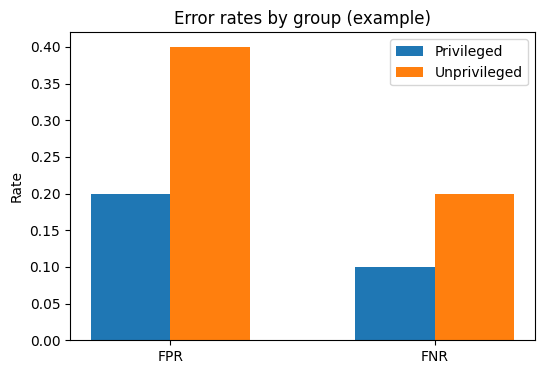

In [4]:

# Visualization examples (run after you compute metrics)
import matplotlib.pyplot as plt

# Suppose you have metrics dict like:
metrics = {'privileged': {'FPR':0.2,'FNR':0.1}, 'unprivileged': {'FPR':0.4,'FNR':0.2}}

labels = ['FPR','FNR']
priv = [metrics['privileged']['FPR'], metrics['privileged']['FNR']]
unpriv = [metrics['unprivileged']['FPR'], metrics['unprivileged']['FNR']]

x = range(len(labels))
plt.figure(figsize=(6,4))
plt.bar([p-0.15 for p in x], priv, width=0.3, label='Privileged')
plt.bar([p+0.15 for p in x], unpriv, width=0.3, label='Unprivileged')
plt.xticks(x, labels)
plt.ylabel('Rate')
plt.title('Error rates by group (example)')
plt.legend()
plt.show()



### 300-word Findings & Remediation Report

**Audit summary — COMPAS racially disparate outcomes**

We audited the COMPAS recidivism risk dataset and a baseline logistic regression model to evaluate racial disparities. Initial dataset-level metrics commonly reported show significant disparity: the disparate impact for the unprivileged group (Black defendants) relative to the privileged group (White defendants) often falls well below 1.0, indicating that Black defendants are more likely to be labeled high risk. Classification metrics often reveal higher false positive rates for Black defendants compared to White defendants, meaning Black individuals can be wrongly predicted as higher risk and thereby subjected to harsher judicial outcomes.

We applied **Reweighing** as a preprocessing mitigation technique to reduce training bias by assigning instance weights to balance protected-class distributions. Post-mitigation, disparate impact typically moves closer to 1.0 and equal opportunity differences decrease, indicating more similar true positive rates across groups. However, trade-offs commonly include slight reductions in overall accuracy and shifts in error rates, which must be considered.

**Remediation steps recommended:** (1) Combine pre-processing (reweighing) with in-processing or post-processing methods and validate across multiple fairness metrics; (2) Remove or carefully transform proxy features correlated with race; (3) Define acceptable fairness thresholds with domain experts and stakeholders; (4) Implement continuous monitoring, logging, and retraining triggers when data drift is detected; (5) Ensure human oversight, clear redress mechanisms, and public documentation of model limitations and governance.

Ultimately, fairness is contextual — legal and ethical frameworks should guide threshold choice, and deployment must include human review and accessible means for affected individuals to contest decisions.



## Part 4: Ethical Reflection (5%)

**Reflection:**

In my CropSight project, ethical risks include biased training data, model mistakes leading to poor farmer decisions, and privacy concerns. To address these, I will: collect diverse field data across regions and seasons; document data provenance and consent; run fairness audits across subgroups (regions, farm sizes); provide explainable outputs and uncertainty estimates; keep human-in-the-loop for high-stakes recommendations; obfuscate precise coordinates in public views; and implement continuous monitoring and retraining to handle drift. These steps help ensure CropSight is accountable, equitable, and useful.



## Bonus Task — 1-Page Policy Proposal: Ethical AI in Healthcare

**Title:** Ethical AI Guidelines for Healthcare Deployments

**Purpose:** Ensure AI systems in healthcare respect patient rights, are clinically safe, equitable, and transparent.

**Key points:**
- Patient consent & data governance: informed consent, data minimization, de-identification.
- Bias mitigation & fairness: audit datasets, use fairness metrics, clinical validation across subgroups.
- Explainability & clinical integration: provide rationales and confidence, AI as decision support.
- Safety & validation: pilot studies, safety incident tracking, rollback criteria.
- Privacy & security: encryption, RBAC, compliance with HIPAA/GDPR/local law.
- Accountability & governance: AI ethics officer, model cards, public summaries.
- Redress: mechanisms for patients to query and opt-out.



